<div align="center">

# Análise da Pokédex
</div>

![Pokémon](bannerpkm.jpg)
   
---

Neste projeto irei fazer uma análise englobando os dados dos pokémons da 1ª à 9ª geração, destacando suas principais características listadas na Pokédex.

## 1- Extraindo dados do arquivo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

arquivo = pd.read_csv("Pokedex.csv", encoding='latin1')
display(arquivo)

,#,Name,Primary Type,Secondary Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Variant
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45.0,NaN
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60.0,NaN
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80.0,NaN
3,3,Venusaur,Grass,Poison,625,80,100,123,122,120,80.0,NaN
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1168,1004,Chi-Yu,Dark,Fire,570,55,80,80,135,120,100.0,NaN
1169,1005,Roaring Moon,Dragon,Dark,590,105,139,71,55,101,119.0,NaN
1170,1006,Iron Valiant,Fairy,Fighting,590,74,130,90,120,60,116.0,NaN
1171,1007,Koraidon,Fighting,Dragon,670,100,135,115,85,100,135.0,NaN


## 2- Entendendo os dados

In [2]:
print(arquivo.head())
print(arquivo.info())

   #        Name Primary Type Secondary Type  Total  HP  Attack  Defense  \
0  1   Bulbasaur        Grass         Poison    318  45      49       49   
1  2     Ivysaur        Grass         Poison    405  60      62       63   
2  3    Venusaur        Grass         Poison    525  80      82       83   
3  3    Venusaur        Grass         Poison    625  80     100      123   
4  4  Charmander         Fire            NaN    309  39      52       43   

   Sp.Atk  Sp.Def  Speed Variant  
0      65      65   45.0     NaN  
1      80      80   60.0     NaN  
2     100     100   80.0     NaN  
3     122     120   80.0     NaN  
4      60      50   65.0     NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   #               1173 non-null   int64  
 1   Name            1173 non-null   object 
 2   Primary Type    1172 non-null   object 
 

## 3- Adicionando uma coluna que verifica se o Pokémon em questão é um lendário ou não

In [3]:
# Lista de Pokémons lendários por geração
legendary_pokemon = {
    1: ['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mew'],
    2: ['Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho-oh', 'Celebi'],
    3: ['Regirock', 'Registeel', 'Regice', 'Latias', 'Latios', 'Kyogre', 'Groudon', 'Rayquaza', 'Jirachi', 'Deoxys'],
    4: ['Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Giratina', 'Heatran', 'Regigigas', 'Cresselia', 'Darkrai', 'Shaymin', 'Arceus'],
    5: ['Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Thundurus', 'Reshiram', 'Zekrom', 'Landorus', 'Kyurem', 'Keldeo', 'Meloetta', 'Genesect'],
    6: ['Xerneas', 'Yveltal', 'Zygarde', 'Diancie', 'Hoopa', 'Volcanion'],
    7: ['Tapu Koko', 'Tapu Lele', 'Tapu Bulu', 'Tapu Fini', 'Cosmog', 'Cosmoem', 'Solgaleo', 'Lunala', 'Necrozma', 'Magearna', 'Marshadow'],
    8: ['Zarude', 'Regieleki', 'Regidrago', 'Calyrex', 'Glastrier', 'Spectrier', 'Eternatus'],
    9: ['Koraidon', 'Miraidon', 'Terapagos']
}

arquivo['Legendary'] = arquivo['Name'].apply(lambda x:any(x == name for names in legendary_pokemon.values() for name in names))
arquivo

,#,Name,Primary Type,Secondary Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Variant,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45.0,NaN,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60.0,NaN,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80.0,NaN,False
3,3,Venusaur,Grass,Poison,625,80,100,123,122,120,80.0,NaN,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,1004,Chi-Yu,Dark,Fire,570,55,80,80,135,120,100.0,NaN,False
1169,1005,Roaring Moon,Dragon,Dark,590,105,139,71,55,101,119.0,NaN,False
1170,1006,Iron Valiant,Fairy,Fighting,590,74,130,90,120,60,116.0,NaN,False
1171,1007,Koraidon,Fighting,Dragon,670,100,135,115,85,100,135.0,NaN,True


## 4- Verificando a Porcentagem de pokémons de cada tipo

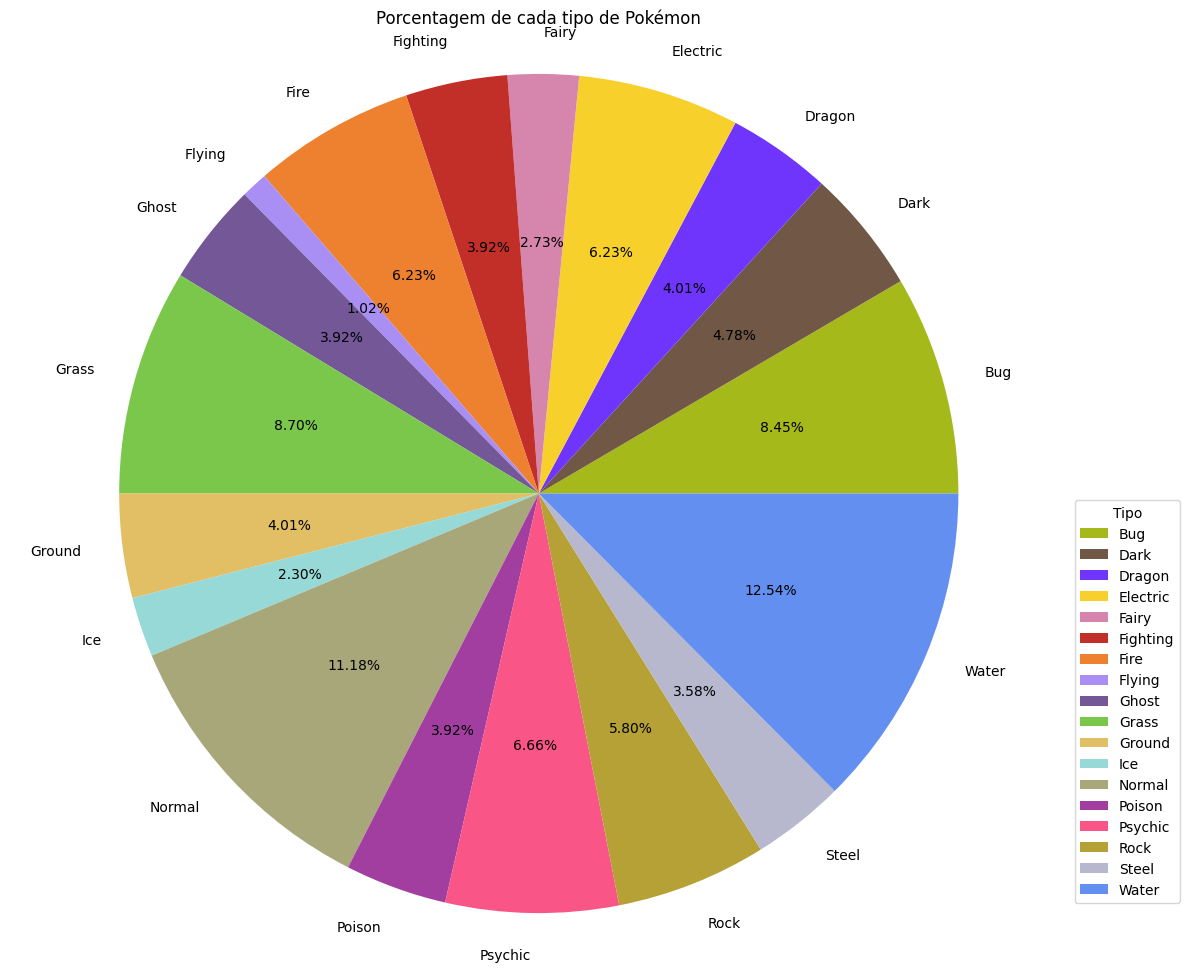

In [4]:
qtd_tipos = arquivo.groupby('Primary Type').size()
# display(qtd_tipos)

tipo = qtd_tipos.index
porcent = qtd_tipos.values 

# Dicionário de cores por tipo de Pokémon
pokemon_colors = {
    "Normal": "#A8A77A",
    "Fire": "#EE8130",
    "Water": "#6390F0",
    "Electric": "#F7D02C",
    "Grass": "#7AC74C",
    "Ice": "#96D9D6",
    "Fighting": "#C22E28",
    "Poison": "#A33EA1",
    "Ground": "#E2BF65",
    "Flying": "#A98FF3",
    "Psychic": "#F95587",
    "Bug": "#A6B91A",
    "Rock": "#B6A136",
    "Ghost": "#735797",
    "Dragon": "#6F35FC",
    "Dark": "#705746",
    "Steel": "#B7B7CE",
    "Fairy": "#D685AD"
}

cores = [pokemon_colors[type] for type in tipo]

plt.figure(figsize=(12,10))
plt.title("Porcentagem de cada tipo de Pokémon")
# plt.figtext(0.2, 0.85, )
plt.pie(porcent, labels=tipo, colors=cores, autopct='%1.2f%%')
plt.axis('equal')
plt.legend([f'{type}' for type in tipo], 
           title="Tipo", loc="best", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

Análise here 




Rogin Apenas

## 5- Analisando quantos Pokémons possuem um tipo secundário

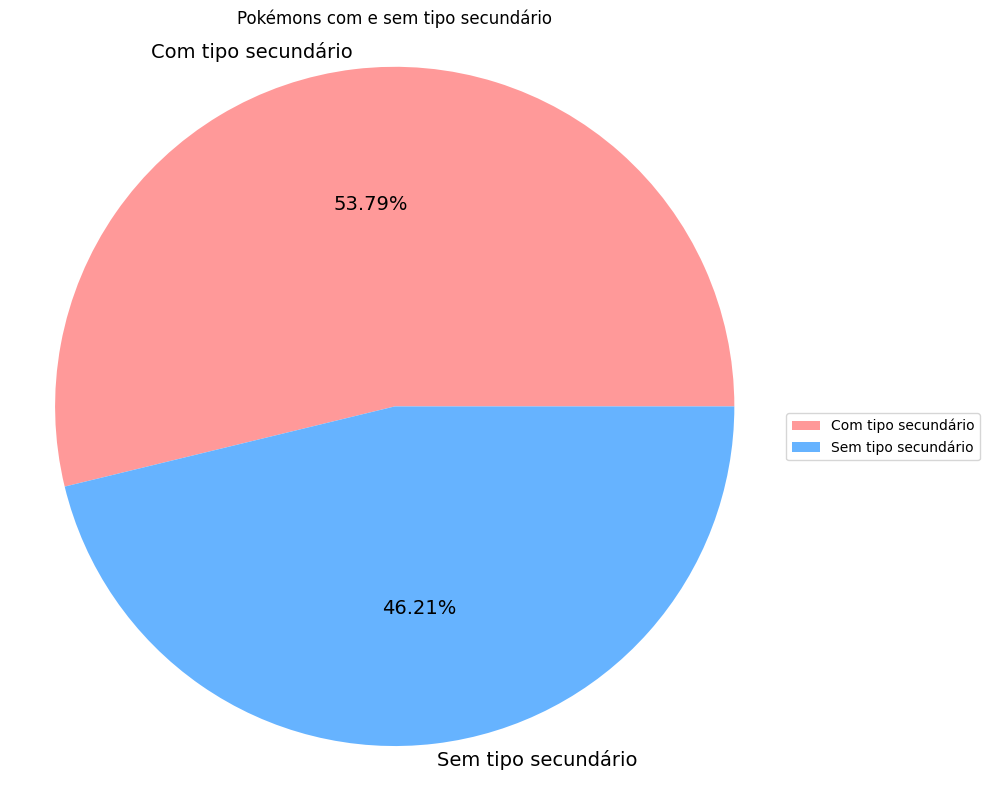

In [5]:
tem_sec = arquivo['Secondary Type'].notna() & (arquivo['Secondary Type'] != '')
total_tip_sec = tem_sec.sum()

plt.figure(figsize=(10,8))
plt.title("Pokémons com e sem tipo secundário")
plt.pie([total_tip_sec, len(arquivo) - total_tip_sec], autopct='%1.2f%%', labels=['Com tipo secundário', 'Sem tipo secundário'], 
        colors=['#ff9999','#66b3ff'], labeldistance=1.05, textprops={'fontsize': 14})
plt.axis('equal')
plt.legend(loc="best", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()






Análise aq



Rogin Apenas

## 6- Comparando a quantidade de lendários distribuída por geração